In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
prices = np.genfromtxt("prices.txt", delimiter="   ").T

In [54]:
n_inst, n_days = prices.shape

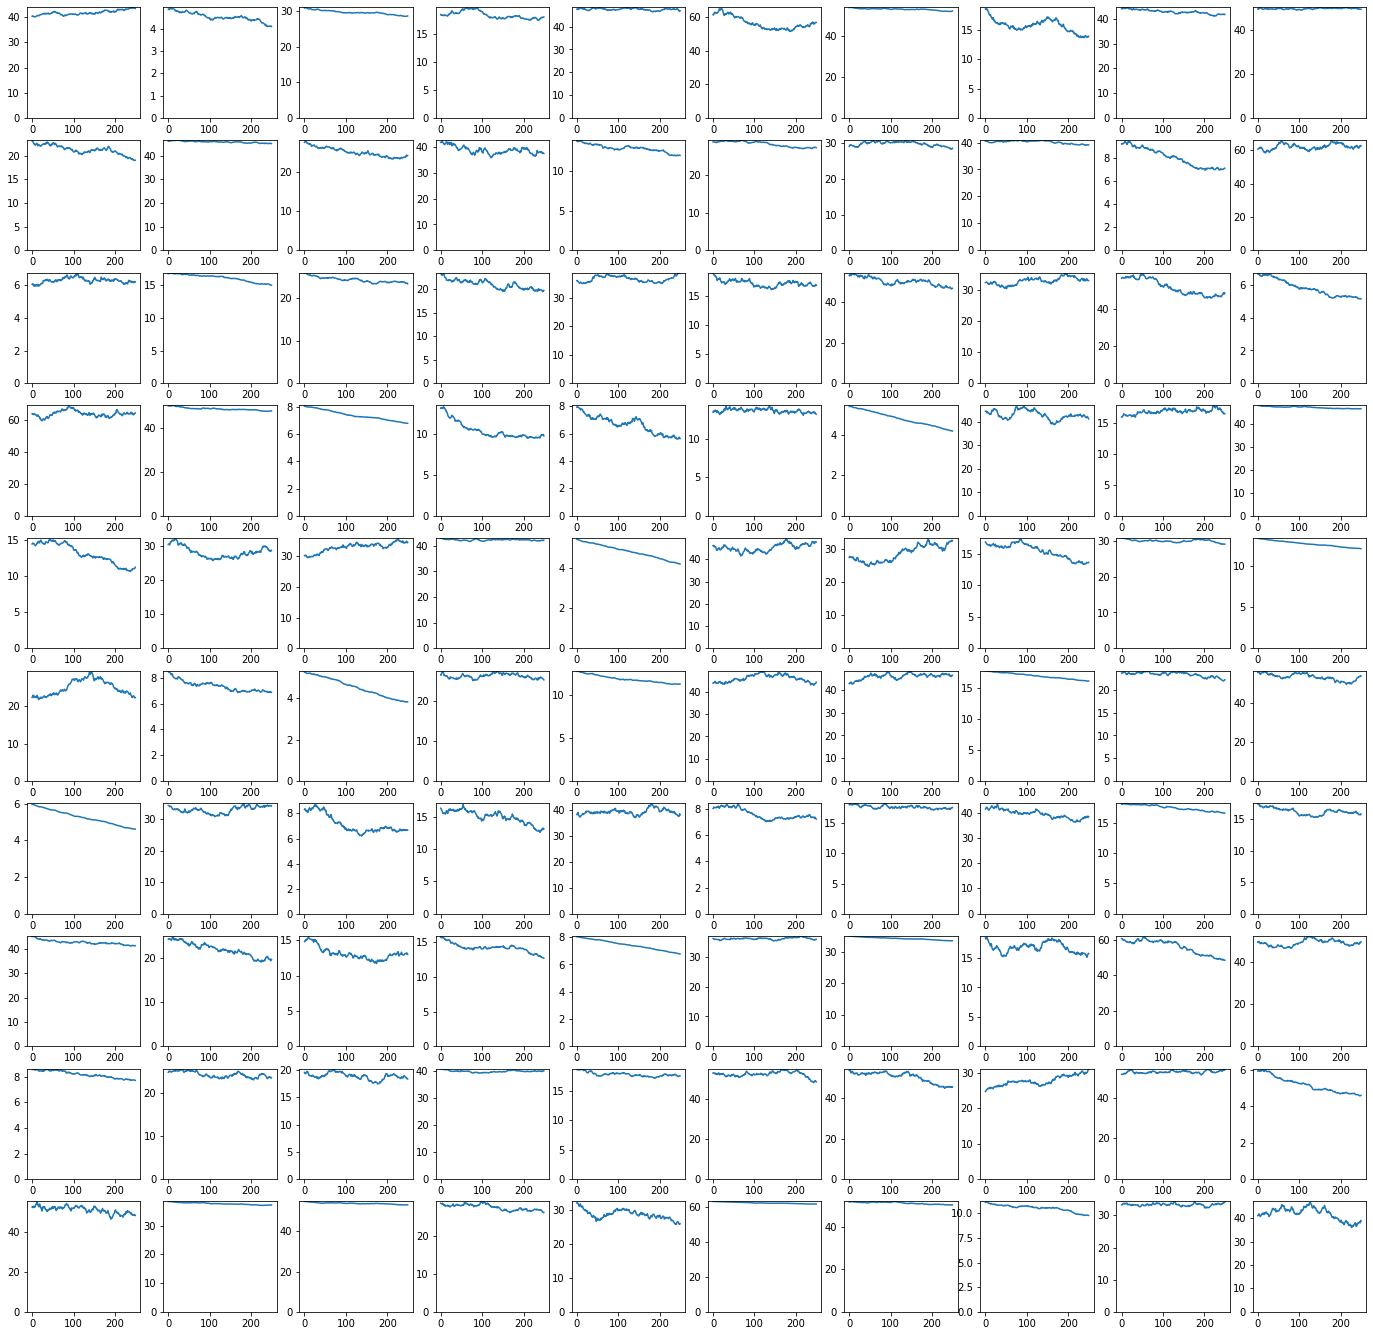

In [55]:
fig, axes = plt.subplots(10, 10, figsize=(24, 24))
for i in range(0, n_inst):
    ax = axes.ravel()[i]
    ax.plot(prices[i])
    ax.set_ylim(bottom=0)
plt.show()

fig.savefig("stocks.png")



scale is scale= 43.87


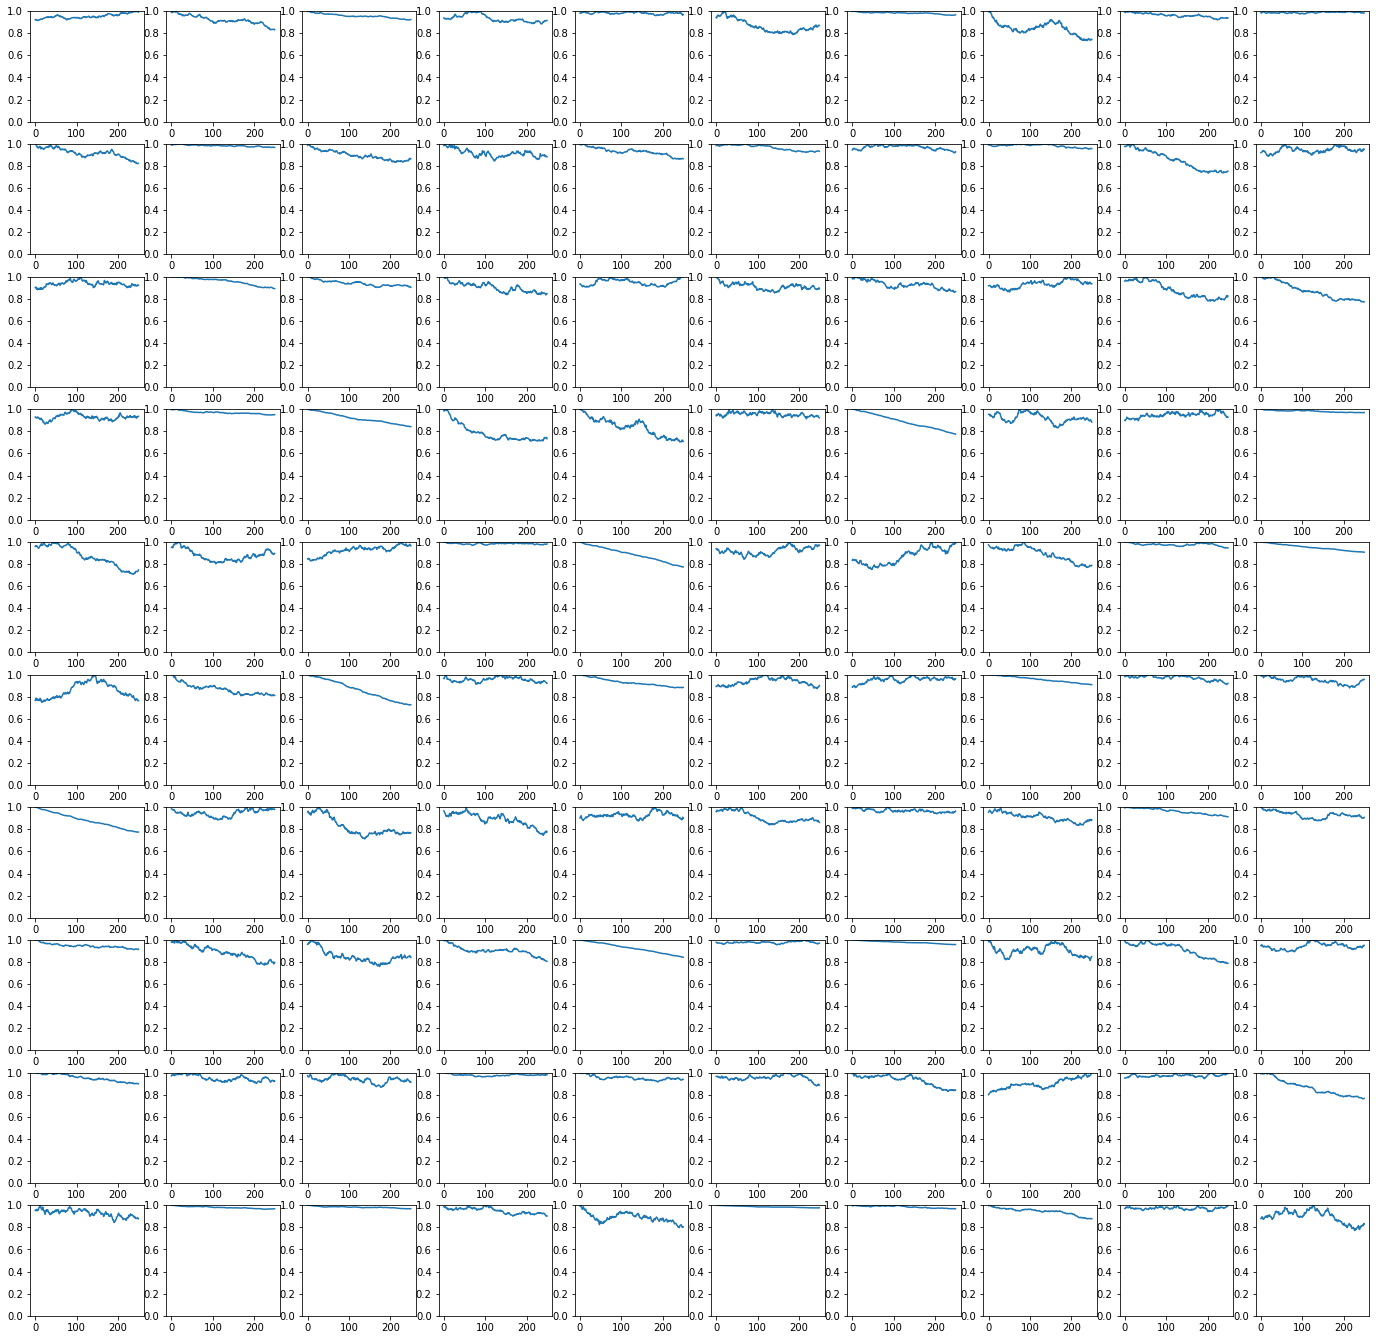

In [56]:
# Scale data from 0 to 1

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_price = scaler.fit_transform(prices)

fig, axes = plt.subplots(10, 10, figsize=(24, 24))

scale = np.max(prices[0])

print(f'scale is {scale= }')

for i in range(0, n_inst):
    ax = axes.ravel()[i]
    
    # ax.plot(prices[i])

    prices[i] /= np.max(prices[i])

    # prices[i] = scaler.fit_transform(prices[i])
    
    ax.plot(prices[i])
    ax.set_ylim(bottom=0, top=1)

plt.show()

fig.savefig("stocks_scaled.png")

In [57]:
# Training data

# np.random.seed(69)

# training_size = int(n_inst/2)
# idx = np.random.choice(prices.shape[0], training_size, replace=False)

# training_data = prices[idx, :]
# print(idx)

# fig, axes = plt.subplots(10, 5, figsize=(24, 24))

# for i in range(0, training_size):
#     ax = axes.ravel()[i]
    
#     ax.plot(training_data[i])
#     ax.set_ylim(bottom=0, top=1)

# plt.show()

# fig.savefig("stocks_scaled.png")

In [58]:
#def create_dataset(data, look_back=1):


# train_x = []
# train_y = []

# inst_1 = prices[0]

# for i in range(60, len(inst_1)):
#     train_x.append(inst_1[i-60: i])
#     train_y.append(inst_1[i])

# train_x = np.array(train_x)
# train_y = np.array(train_y)

# plt.plot(train_x)
# plt.plot(train_y)

# print((train_x.shape[1], 1))

# print(train_x, (train_x.shape[0], train_x.shape[1], 1))

# print(train_x.shape[1], 1)

# print(train_y)

In [62]:
train_x = []
train_y = []

inst_1 = prices[0]

len_validate = 100
len_train = 60

# train the model with the first 200 days
for i in range(len_train, len(inst_1)-len_validate):
    train_x.append(inst_1[i-len_train: i])
    train_y.append(inst_1[i])

train_x = np.array(train_x)
train_y = np.array(train_y)

train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))

train_x.shape, train_y.shape



((90, 60, 1), (90,))

In [63]:
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(train_x.shape[1], 1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=60, activation='relu', return_sequences=True))
lstm_model.add(Dropout(0.3))

lstm_model.add(LSTM(units=80, activation='relu', return_sequences=True))
lstm_model.add(Dropout(0.4))

lstm_model.add(LSTM(units=120, activation='relu'))
lstm_model.add(Dropout(0.5))

lstm_model.add(Dense(units=1))


lstm_model.summary()




Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_27 (LSTM)              (None, 60, 60)            26640     
                                                                 
 dropout_9 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_28 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_10 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_29 (LSTM)              (None, 120)             

In [64]:
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

lstm_model.fit(train_x, train_y, epochs=10, batch_size=32)

Epoch 1/10
3/3 [==============================] - 5s 98ms/step - loss: 0.8526
Epoch 2/10
3/3 [==============================] - 0s 94ms/step - loss: 0.7098
Epoch 3/10
3/3 [==============================] - 0s 92ms/step - loss: 0.4269
Epoch 4/10
3/3 [==============================] - 0s 95ms/step - loss: 0.1043
Epoch 5/10
3/3 [==============================] - 0s 90ms/step - loss: 0.0374
Epoch 6/10
3/3 [==============================] - 0s 91ms/step - loss: 0.0538
Epoch 7/10
3/3 [==============================] - 0s 88ms/step - loss: 0.0346
Epoch 8/10
3/3 [==============================] - 0s 89ms/step - loss: 0.0323
Epoch 9/10
3/3 [==============================] - 0s 89ms/step - loss: 0.0339
Epoch 10/10
3/3 [==============================] - 0s 88ms/step - loss: 0.0341


In [65]:
# # predict future stock prices
past_price = inst_1[len(inst_1) - (len_validate) - 1 - len_train:]
past_price = past_price.reshape(-1, 1)

test_x = []
test_y = []

for i in range(len_train, past_price.shape[0]):
    test_x.append(past_price[i-len_train:i])
    test_y.append(past_price[i, 0])

test_x = np.array(test_x)
test_y = np.array(test_y)
# # test_result.reshape(test_result, (test_result.shape[0], test_result.shape[1],1))

test_x.shape, test_y.shape
# model_prediction = lstm_model.predict(test_result)

((101, 60, 1), (101,))

4/4 [==============================] - 0s 24ms/step


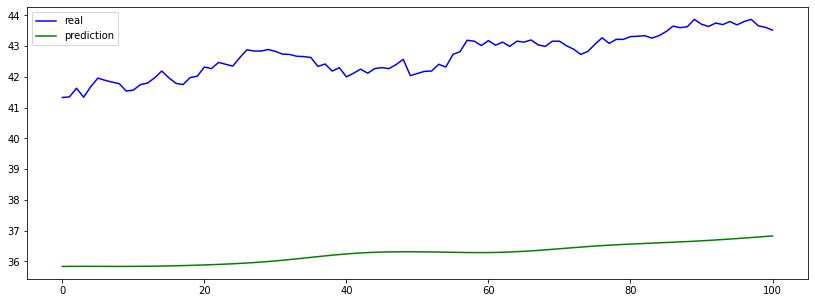

In [68]:
y_pred = lstm_model.predict(test_x)

plt.figure(figsize=(14, 5))

plt.plot(test_y*scale, color='b', label='real')
plt.plot(y_pred*scale, color='g', label='prediction')

plt.legend()
plt.show()

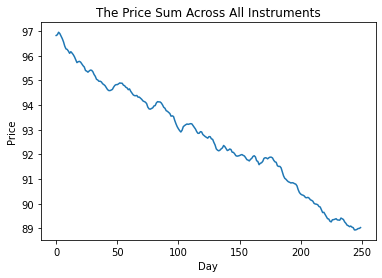

In [67]:

price_sum = prices.sum(axis=0)
plt.plot(price_sum)
plt.title("The Price Sum Across All Instruments")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()